In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import mode
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_csv(r"C:\Users\dasar\OneDrive\Desktop\prescription\finalTraining.csv")
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Fungal infection,Drug={clotrimazole,econazole,..."
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Fungal infection,Drug={clotrimazole,econazole,..."
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Fungal infection,Drug={clotrimazole,econazole,..."
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Fungal infection,Drug={clotrimazole,econazole,..."
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Fungal infection,Drug={clotrimazole,econazole,..."


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [4]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [5]:
df.dropna(axis=1,inplace=True)

In [6]:
df['prognosis'].value_counts()

prognosis
Fungal infection,Drug={clotrimazole,econazole,miconazole,amphotericin}                                                                            120
Hepatitis C,Drug={ribavirin,ledipasvir,sofosbuvir,peginterferon alfa-2a}                                                                          120
Hepatitis E,Consult Doctor                                                                                                                        120
Alcoholic hepatitis,Drug={Corticosteroids,Pentoxifylline}                                                                                         120
Tuberculosis,Drug={prednisone,cycloserine}                                                                                                        120
Common Cold,Drug={Acetaminophen,Ibuprofen,Cetirizine}                                                                                             120
Pneumonia,Drug={Fluroquinolones,Cephalosporins,Macrolides,Monobactams}                    

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [9]:
# value using LabelEncoder
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

In [10]:
# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18),
}

In [11]:
# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([("classifier", model)])

In [12]:
# Producing cross-validation score for the models
for model_name, pipeline in pipelines.items():
    scores = cross_val_score(
        pipeline, X, y, cv=10, n_jobs=-1, scoring="accuracy"
    )
    print("=" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVC Classifier: 100.0
Accuracy on test data by SVC Classifier: 100.0


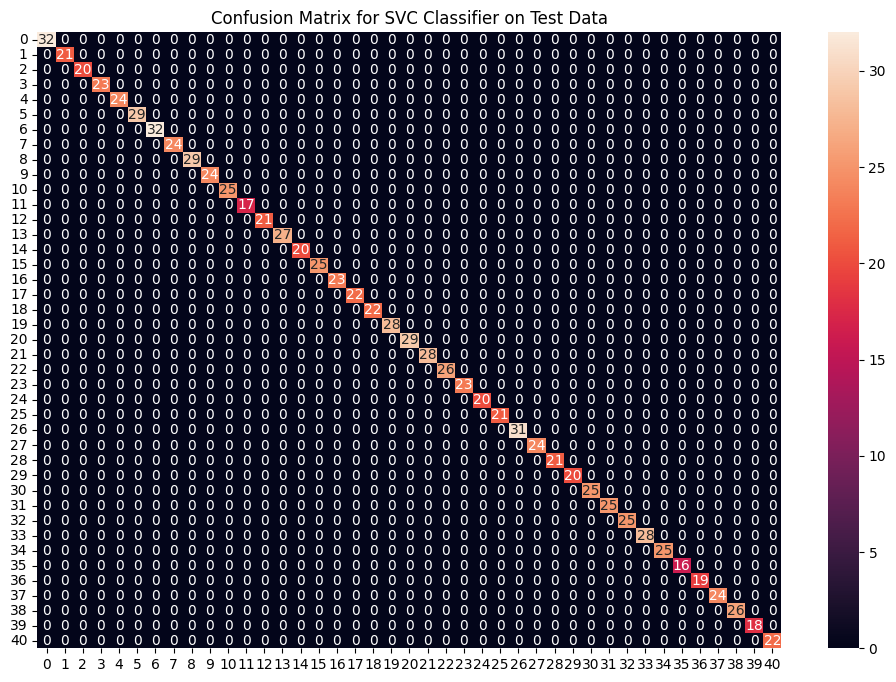

Accuracy on train data by Gaussian NB Classifier: 100.0
Accuracy on test data by Gaussian NB Classifier: 100.0


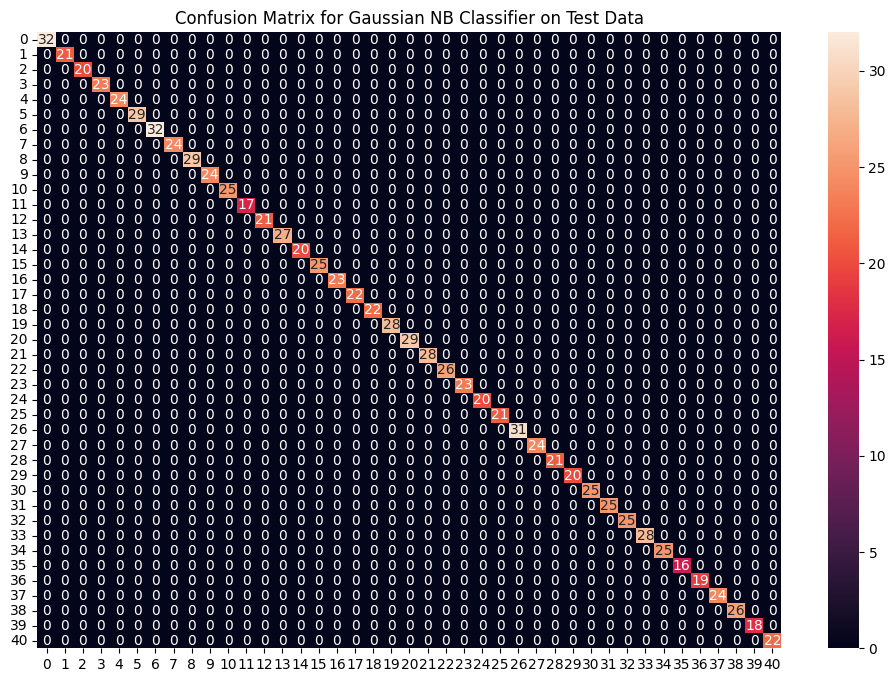

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


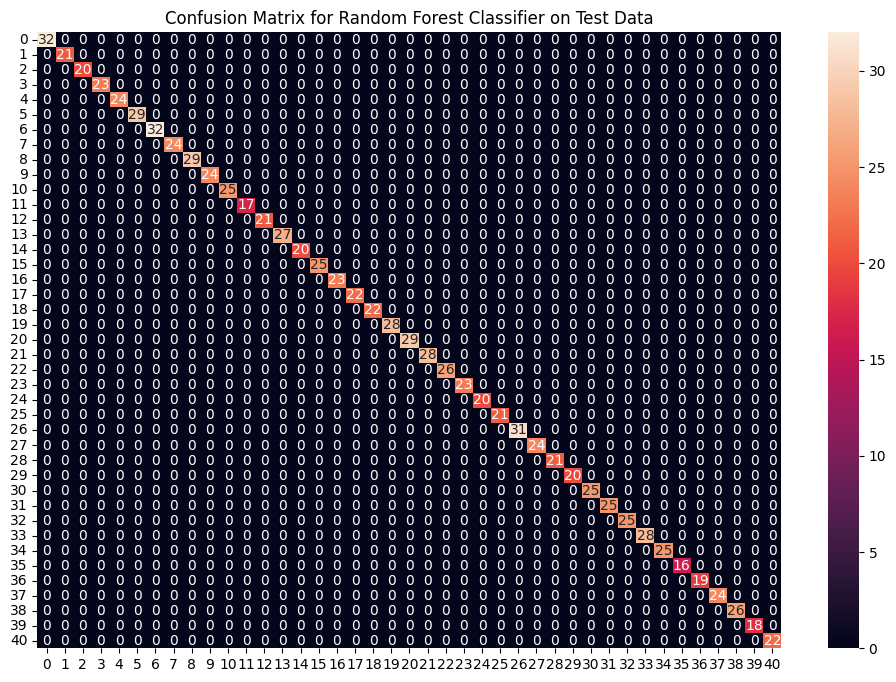

In [13]:
# Training and testing each model
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    print(f"Accuracy on train data by {model_name} Classifier: {accuracy_score(y_train, pipeline.predict(X_train)) * 100}")
    print(f"Accuracy on test data by {model_name} Classifier: {accuracy_score(y_test, preds) * 100}")

    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} Classifier on Test Data")
    plt.show()

In [14]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

C:\Users\dasar\AppData\Local\Temp\ipykernel_12812\1799034080.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds, _ = mode([svm_preds, nb_preds, rf_preds], axis=0)


Accuracy on Test dataset by the combined model: 100.0


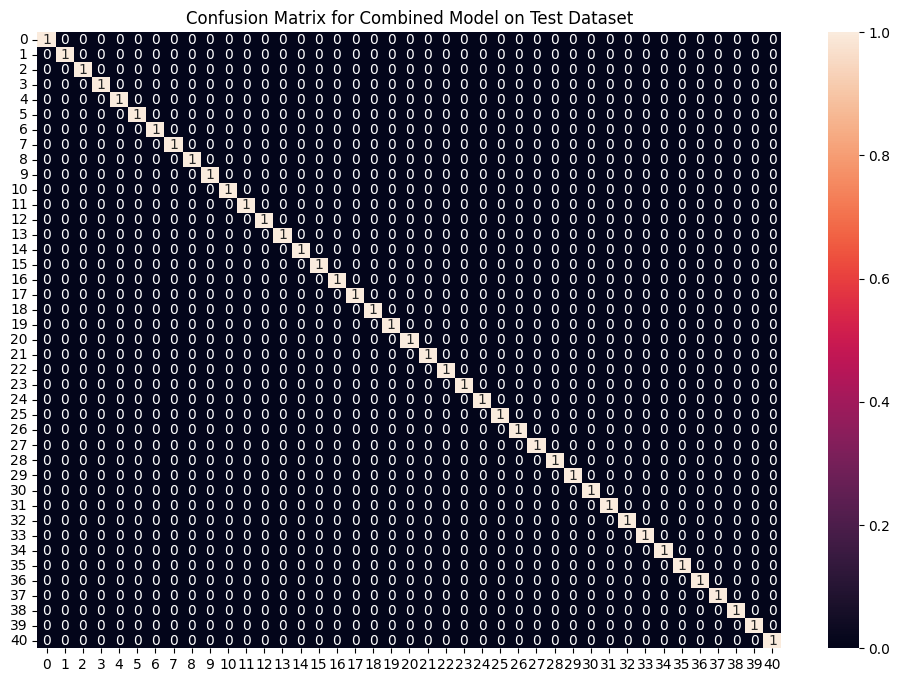

In [15]:
# Reading the test data
test_data = pd.read_csv(r"C:\Users\dasar\OneDrive\Desktop\prescription\finalTesting.csv")
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making predictions by taking the mode of predictions 
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Use SciPy's mode function
final_preds, _ = mode([svm_preds, nb_preds, rf_preds], axis=0)
final_preds = final_preds.flatten()
# Calculating and printing accuracy on the test dataset
accuracy = accuracy_score(test_Y, final_preds) * 100
print(f"Accuracy on Test dataset by the combined model: {accuracy}")

# Visualizing the confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [16]:
symptoms = X.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # Reshaping the input data and converting it
    # into a suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # Generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # Finding the mode using Counter
    predictions_list = [rf_prediction, nb_prediction, svm_prediction]
    count_predictions = Counter(predictions_list)
    final_prediction = count_predictions.most_common(1)[0][0]

    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions

In [17]:
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection,Drug={clotrimazole,econazole,miconazole,amphotericin}', 'naive_bayes_prediction': 'Fungal infection,Drug={clotrimazole,econazole,miconazole,amphotericin}', 'svm_model_prediction': 'Fungal infection,Drug={clotrimazole,econazole,miconazole,amphotericin}', 'final_prediction': 'Fungal infection,Drug={clotrimazole,econazole,miconazole,amphotericin}'}


In [18]:
print(predictDisease("Cough,High Fever,Breathlessness,Fatigue,Chest Pain"))

{'rf_model_prediction': 'Bronchial Asthma,Drug={Fluticasone,salmeterol,Budesonide,formoterol,Mometasone}', 'naive_bayes_prediction': 'Bronchial Asthma,Drug={Fluticasone,salmeterol,Budesonide,formoterol,Mometasone}', 'svm_model_prediction': 'Bronchial Asthma,Drug={Fluticasone,salmeterol,Budesonide,formoterol,Mometasone}', 'final_prediction': 'Bronchial Asthma,Drug={Fluticasone,salmeterol,Budesonide,formoterol,Mometasone}'}


In [19]:
print(predictDisease("Sweating,Chest Pain,Nausea,Breathlessness"))

{'rf_model_prediction': 'Heart attack,Consult Doctor', 'naive_bayes_prediction': 'Heart attack,Consult Doctor', 'svm_model_prediction': 'Heart attack,Consult Doctor', 'final_prediction': 'Heart attack,Consult Doctor'}


In [20]:
import pickle

In [21]:
pickle.dump(final_rf_model, open('randomforest.pkl', 'wb'))

In [22]:
pickle.dump(final_rf_model, open('GaussianNB.pkl', 'wb'))

In [23]:
pickle.dump(final_rf_model, open('svm_model.pkl', 'wb'))
pickle.dump(encoder,open('label_encoder.pkl', 'wb'))

In [24]:
with open("randomforest.pkl", "rb") as f:
    final_rf_model = pickle.load(f)

with open("GaussianNB.pkl", "rb") as g:
    final_nb_model = pickle.load(g)

with open("svm_model.pkl", "rb") as s:
    final_svm_model = pickle.load(s)


In [25]:
import numpy as np
symptoms = np.array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure',
       'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs',
       'fast_heart_rate', 'pain_during_bowel_movements',
       'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus',
       'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity',
       'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes',
       'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties',
       'excessive_hunger', 'extra_marital_contacts',
       'drying_and_tingling_lips', 'slurred_speech', 'knee_pain',
       'hip_joint_pain', 'muscle_weakness', 'stiff_neck',
       'swelling_joints', 'movement_stiffness', 'spinning_movements',
       'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side',
       'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine',
       'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching',
       'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain',
       'altered_sensorium', 'red_spots_over_body', 'belly_pain',
       'abnormal_menstruation', 'dischromic _patches',
       'watering_from_eyes', 'increased_appetite', 'polyuria',
       'family_history', 'mucoid_sputum', 'rusty_sputum',
       'lack_of_concentration', 'visual_disturbances',
       'receiving_blood_transfusion', 'receiving_unsterile_injections',
       'coma', 'stomach_bleeding', 'distention_of_abdomen',
       'history_of_alcohol_consumption', 'fluid_overload.1',
       'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations',
       'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
       'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails',
       'inflammatory_nails', 'blister', 'red_sore_around_nose',
       'yellow_crust_ooze'])

In [26]:
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # Reshaping the input data and converting it
    # into a suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # Generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # Finding the mode using Counter
    predictions_list = [rf_prediction, nb_prediction, svm_prediction]
    count_predictions = Counter(predictions_list)
    final_prediction = count_predictions.most_common(1)[0][0]

    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions

In [27]:
print(predictDisease("Sweating,Chest Pain,Nausea,Breathlessness"))

{'rf_model_prediction': 'Heart attack,Consult Doctor', 'naive_bayes_prediction': 'Heart attack,Consult Doctor', 'svm_model_prediction': 'Heart attack,Consult Doctor', 'final_prediction': 'Heart attack,Consult Doctor'}
